# Data Science Project: Planning Stage (Individual)

**1) Data Description**

In [1]:
set.seed(2025)
library(tidyverse)
library(dplyr)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [2]:
# load data
player_data_url <- "https://raw.githubusercontent.com/chrislee330/dsci-100-project-indiv/refs/heads/main/data/players.csv"
session_data_url = "https://raw.githubusercontent.com/chrislee330/dsci-100-project-indiv/refs/heads/main/data/sessions.csv"

player_data <- read_csv(player_data_url)
session_data <- read_csv(session_data_url)

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [3]:
# Data Description For player.csv (player_data)

# number of observations
nrow(player_data) #196 obs

# number of variables, name and type of variables, what the variables mean,
head(player_data)

#summary statistics
summary(player_data)

player_data |>
  summarize(sd_Age = sd(Age, na.rm = TRUE))
player_data |>
  summarize(sd_played_hours = sd(played_hours))

[1] 196

experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17


  experience        subscribe       hashedEmail         played_hours    
 Length:196         Mode :logical   Length:196         Min.   :  0.000  
 Class :character   FALSE:52        Class :character   1st Qu.:  0.000  
 Mode  :character   TRUE :144       Mode  :character   Median :  0.100  
                                                       Mean   :  5.846  
                                                       3rd Qu.:  0.600  
                                                       Max.   :223.100  
                                                                        
     name              gender               Age       
 Length:196         Length:196         Min.   : 9.00  
 Class :character   Class :character   1st Qu.:17.00  
 Mode  :character   Mode  :character   Median :19.00  
                                       Mean   :21.14  
                                       3rd Qu.:22.75  
                                       Max.   :58.00  
                               

sd_Age
<dbl>
7.389687


sd_played_hours
<dbl>
28.35734


**Data description for player.csv (player_data)**
- 196 observations, 196 unique players played on (PLAICraft) Server
- 7 variables which represents:
    1. `experience` (**character**):
        - player's experience playing Minecraft
    2. `subscribe` (**logical**):
        - player's subscription status
    3. `hashedEmail` (**character**):
        - player's hashed email
    4. `played_hours` (**numeric (double)**):
        - player's total played hours on the server
    5. `name` (**character**):
        - player's name
    6. `gender` (**character**):
        - player's gender
    7. `Age` (**numeric (double)**):
        - player's age
- Summary Statistics:
    - `Age` ranges from 9.00 to 58.00 years (mean=21.14, median=19.00, standard_deviation=7.39)
    - `played_hours` ranges from 0.00 to 223.10 hours (mean=5.85, median=0.10, standard_deviation=28.36)
- Issues identified about the dataset:
    - 2 missing values in `Age`

In [4]:
# Data Description For sessions.csv (session_data)

# number of observations
nrow(session_data) #1535 obs

# number of variables, name and type of variables, what the variables mean,
head(session_data)

#summary statistics
summary(session_data)

session_data |>
  summarize(sd_original_start_time = sd(original_start_time))
session_data |>
  summarize(sd_original_end_time = sd(original_end_time, na.rm = TRUE))

[1] 1535

hashedEmail,start_time,end_time,original_start_time,original_end_time
<chr>,<chr>,<chr>,<dbl>,<dbl>
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,30/06/2024 18:12,30/06/2024 18:24,1.71977e+12,1.71977e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,17/06/2024 23:33,17/06/2024 23:46,1.71867e+12,1.71867e+12
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,25/07/2024 17:34,25/07/2024 17:57,1.72193e+12,1.72193e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,25/07/2024 03:22,25/07/2024 03:58,1.72188e+12,1.72188e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,25/05/2024 16:01,25/05/2024 16:12,1.71665e+12,1.71665e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,23/06/2024 15:08,23/06/2024 17:10,1.71916e+12,1.71916e+12


 hashedEmail         start_time          end_time         original_start_time
 Length:1535        Length:1535        Length:1535        Min.   :1.712e+12  
 Class :character   Class :character   Class :character   1st Qu.:1.716e+12  
 Mode  :character   Mode  :character   Mode  :character   Median :1.719e+12  
                                                          Mean   :1.719e+12  
                                                          3rd Qu.:1.722e+12  
                                                          Max.   :1.727e+12  
                                                                             
 original_end_time  
 Min.   :1.712e+12  
 1st Qu.:1.716e+12  
 Median :1.719e+12  
 Mean   :1.719e+12  
 3rd Qu.:1.722e+12  
 Max.   :1.727e+12  
 NA's   :2          

sd_original_start_time
<dbl>
3557491589


sd_original_end_time
<dbl>
3552813134


**Data description for sessions.csv (session_data)**
- 1535 observations, 1535 individual play sessions on (PLAICraft) Server 
- 5 variables which represents:
    1. `hashedEmail` (**character**):
        - player's hashed email
    2. `start_time` (**character**):
        - Start timestamp of the game session, DD/MM/YYYY HH:MM
    3. `end_time` (**character**):
        - Start timestamp of the game session, DD/MM/YYYY HH:MM
    4. `original_start_time` (**numeric (double)**):
        - the unix epoch timestamp for start_time
    5. `original_end_time` (**numeric (double)**):
        - the unix epoch timestamp for end_time
- Summary Statistics:
    - `start_time` and `end_time` range: April to September 2024
    - unix time (1.71e+12 to 1.73e+12)
        - `start_time`: mean=1.72e+12, median=1.719e+12, standard_deviation=3.56e+09
        - `end_time`: mean=1.72e+12, median=1.719e+12, standard_deviation=3.55e+09
- Issues identified about the dataset:
    - 2 missing values in `end_time` and `original_end_time`
    - Unix-calibrated-time could cause issues, may need to be processed

**player_data, session_data collected:**
-  from the platform's database because total_hours_played, player's start and end-time are likely automatically logged.
-  player's demographic features came from when they signed up.

**Purpose:** to understand more about people's video game behaviours.
  

**2) Questions:**

Broad Question: Q1

**My Question: Can the player's age and played hours predict whether the player will subscribe to the newsletter in the player.csv dataset?**

This dataset contains many variables that can be used to predict a player's subscription status. Additionally, these variables provide predictor features (`experience`, `gender`, `Age`, `played_hours`) and target variable (`subscribe`) which means it can be used to build a classification model.

Plan for wrangling data:
- Since I only need `Age`, `played_hours`, `subscribe` variables, I can remove irrelevant variables (`name`, `hashedEmail`, `experience`, `gender`) and not use sessions.csv dataset
- Handle the missing values in `Age`
- I don't need to tidy the data as I want to include all Age and played_hours as is.
- can handle `subscription` as categorical form

After wrangling the data, I can apply a classification method (e.g K-NN) to predict `subscribe` based off the player's demographic features.


**3) Exploratory Data Analysis and Visualization**



In [5]:
# Summary statistics (median, standard deviation, mean)
players_median <- player_data |>
                select(played_hours, Age) |>
                map_dfr(median, na.rm = TRUE)
players_median

players_sd <- player_data |>
                select(played_hours, Age) |>
                map_dfr(sd, na.rm = TRUE)
players_sd

players_mean <- player_data |>
                select(played_hours, Age) |>
                map_dfr(mean, na.rm = TRUE)
players_mean

played_hours,Age
<dbl>,<dbl>
0.1,19


played_hours,Age
<dbl>,<dbl>
28.35734,7.389687


played_hours,Age
<dbl>,<dbl>
5.845918,21.13918


- The mean age is 21.14 years and the mean played hours is 5.85 hours.

Warning message:
“Removed 2 rows containing non-finite outside the scale range (`stat_bin()`).”
Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_point()`).”


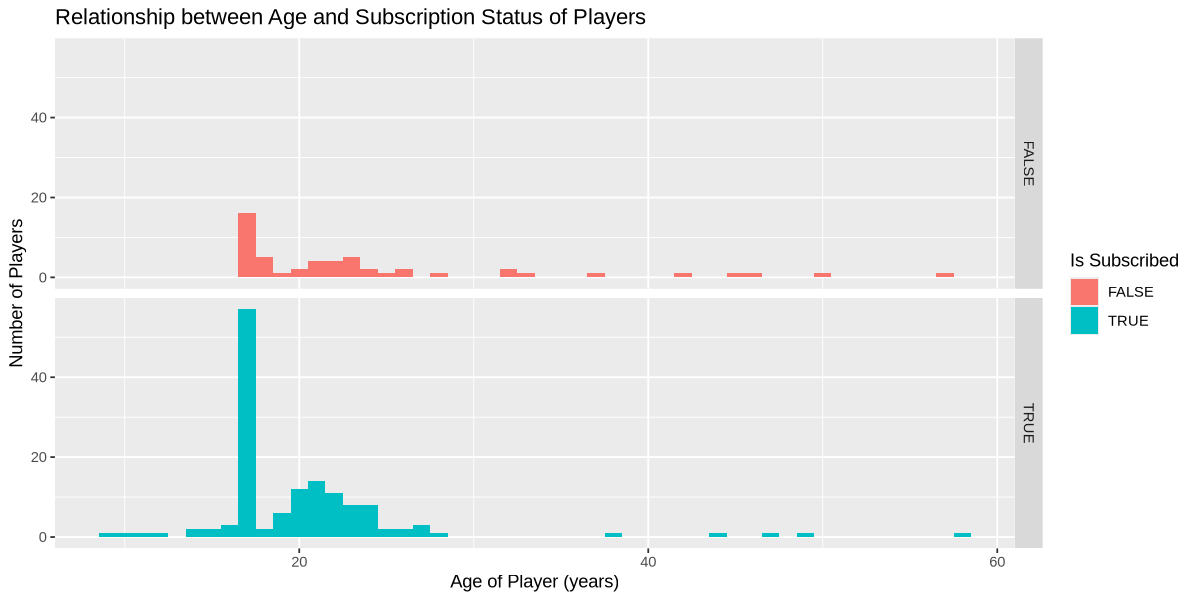

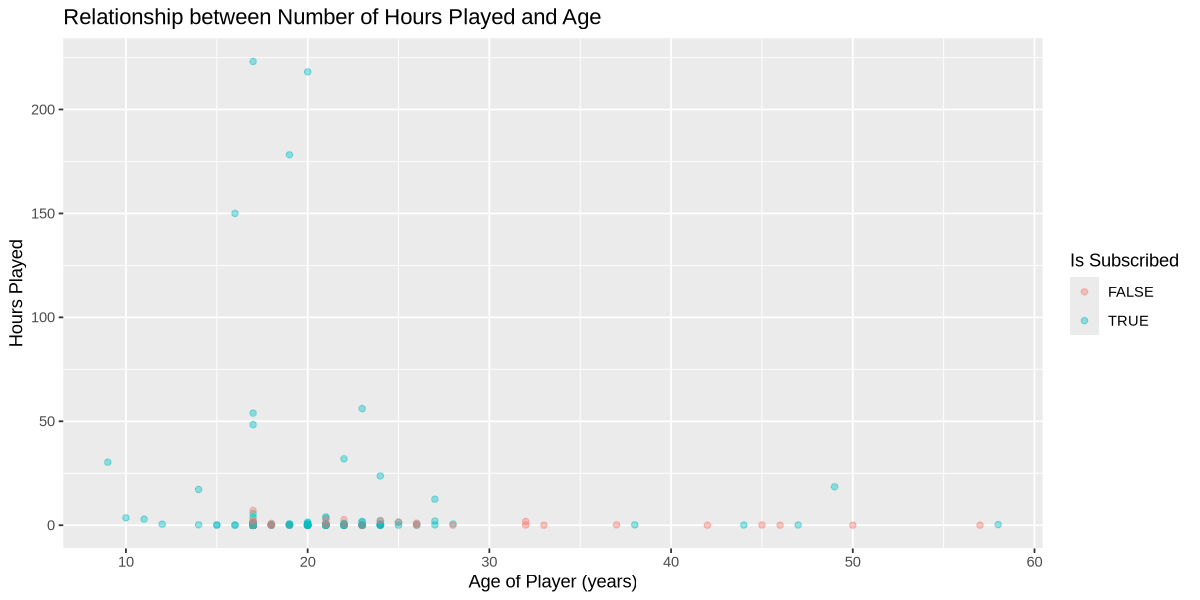

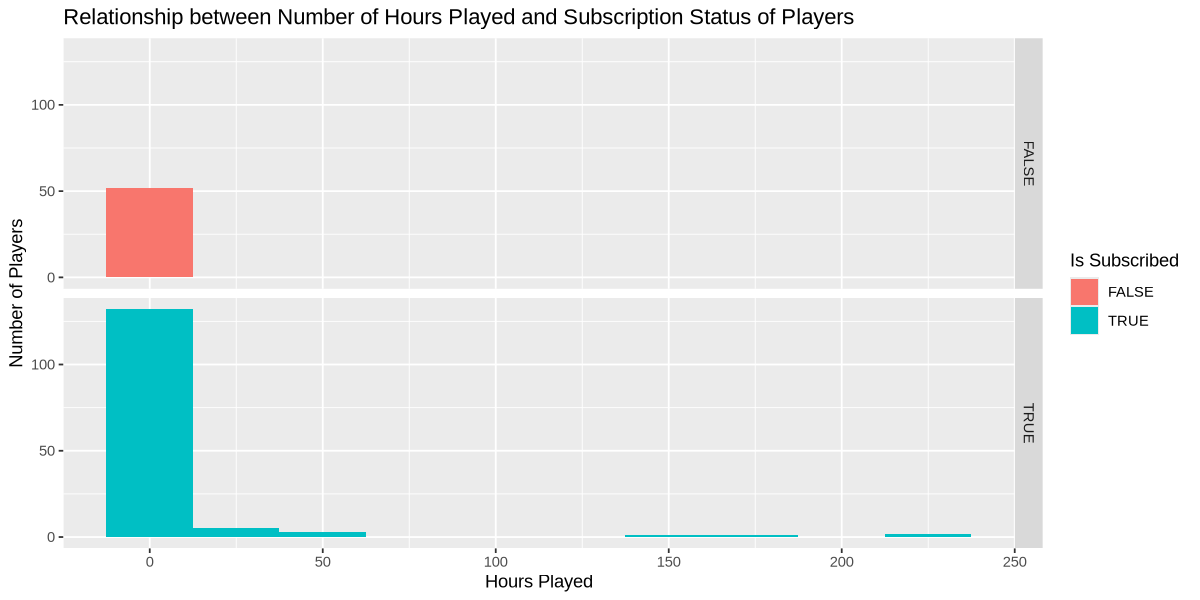

In [6]:
options(repr.plot.height = 5, repr.plot.width = 10)
players_plot_1 <- player_data |>
                  ggplot(aes(x = Age, fill = subscribe)) +
                    geom_histogram(binwidth = 1) +
                    facet_grid(rows = vars(subscribe)) +
                    labs(x = "Age of Player (years)", y = "Number of Players", fill = "Is Subscribed") +
                    ggtitle("Relationship between Age and Subscription Status of Players")
players_plot_1
players_plot_2 <- player_data |>
                  ggplot(aes(x = Age, y = played_hours, color = subscribe)) +
                    geom_point(alpha = 0.4) +
                    labs(x = "Age of Player (years)", y = "Hours Played", color = "Is Subscribed") +
                    ggtitle("Relationship between Number of Hours Played and Age")
players_plot_2
players_plot_3 <- player_data |>
                  ggplot(aes(x = played_hours, fill = subscribe)) +
                    geom_histogram(binwidth = 25) +
                    facet_grid(rows = vars(subscribe)) +
                    labs(x = "Hours Played", y = "Number of Players", fill = "Is Subscribed") +
                    ggtitle("Relationship between Number of Hours Played and Subscription Status of Players")
players_plot_3

- From the plots, there’s no strong relationship between age and subscription status.
- However, there appears to be a moderate positive relationship between hours played and subscription status.

**4) Methods and Plan**

- To address my question, I will use a K-NN classification model. 
    - This method is appropriate because I want to predict a class based on two quantitative variables.
    - K-NN method fits these parameters.
- Assume:
    - Response variable is in categorical form (e.g.factor)
    - Know if my data is already standardized.
- Potential weaknesses of the model:
    - Not scaling well and being too slow for large amounts of data.
    - Lack of strong relationships might cause inaccurate predictions.
- Comparing and selecting the model:
    - Use 5-fold cross-validation with appropriate fitting to choose a highly accurate k-value.
    - I will split the data into training and testing sets, using a 70% proportion for the training set.
        - At the start so I don't mess with the model when tuning with the testing data.    